In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import collections
import os
import glob
import re
import json
import shutil
import datetime
import math
from datetime import datetime
import matplotlib.dates as mdates
pd.set_option('display.max_rows', 10000)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import os
import glob
import re
import shutil
from collections import Counter
from scipy.optimize import minimize
from scipy.special import logsumexp
import warnings
pd.set_option('display.max_rows', 10000)
np.set_printoptions(precision=64)
# pd.set_option('display.float_format', lambda x: f'{x:,.5f}')
# https://just-random-thoughts.blog/2021/01/23/cdc-ensemble-forecast-model-for-covid-19/
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [136]:
year_inf= 2023
year_sup= 2024
# season= str(year_inf)+"_"+str(year_sup)+"_"+"season"
# path= "./FluSight-forecast-hub/model-output/"
path= "./Flusight-forecast-data-master/data-forecasts/" 
All_paths= [x[0] for x in os.walk(path)][1:]
# All_paths
teams= [i.rsplit('/', 1)[-1] for i in All_paths]
teams

['CADPH-FluCAT_Ensemble',
 'CEID-Walk',
 'CEPH-Rtrend_fluH',
 'CMU-TimeSeries',
 'CU-ensemble',
 'Flusight-baseline',
 'GH-Flusight',
 'GT-FluFNP',
 'IEM_Health-FluProject',
 'ISU_NiemiLab-Flu',
 'JHUAPL-Gecko',
 'JHU_IDD-CovidSP',
 'LosAlamos_NAU-CModel_Flu',
 'LUcompUncertLab-ensemble_rclp',
 'LUcompUncertLab-experthuman',
 'LUcompUncertLab-hier_mech_model',
 'LUcompUncertLab-humanjudgment',
 'LUcompUncertLab-HWAR2',
 'LUcompUncertLab-KalmanFilter',
 'LUcompUncertLab-stacked_ili',
 'LUcompUncertLab-TEVA',
 'LUcompUncertLab-VAR2',
 'LUcompUncertLab-VAR2K',
 'LUcompUncertLab-VAR2K_plusCOVID',
 'LUcompUncertLab-VAR2_plusCOVID',
 'MIGHTE-Nsemble',
 'MOBS-GLEAM_FLUH',
 'NIH-Flu_ARIMA',
 'PSI-DICE',
 'SGroup-RandomForest',
 'SGroup-SIkJalpha',
 'SigSci-CREG',
 'SigSci-TSENS',
 'UGA_flucast-OKeeffe',
 'UGuelph-FluPLUG',
 'Umass-ARIMA',
 'UMass-gbq',
 'UMass-trends_ensemble',
 'UNC_IDD-InfluPaint',
 'UT_FluCast-Voltaire',
 'UVAFluX-Ensemble',
 'VTSanghani-ExogModel',
 'VTSanghani-Transformer

In [137]:
data_locations= "Flusight-forecast-data-master"+"/"+"data-locations"+"/"+"locations.csv"
locations= pd.read_csv(data_locations)
locations

,abbreviation,location,location_name,population,count_rate1per100k,count_rate2per100k
0,US,US,US,331893745,3319,6638
1,AL,01,Alabama,5039877,50,101
2,AK,02,Alaska,732673,7,15
3,AZ,04,Arizona,7276316,73,146
4,AR,05,Arkansas,3025891,30,61
5,CA,06,California,39237836,392,785
6,CO,08,Colorado,5812069,58,116
7,CT,09,Connecticut,3605597,36,72
8,DE,10,Delaware,1003384,10,20
9,DC,11,District of Columbia,670050,7,13


In [138]:
state_names= list(locations['location_name'].unique())
print(len(state_names))
state_names

54


['US',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Puerto Rico',
 'Virgin Islands']

In [139]:
state_idx_name= dict()
for st in state_names:
    selected_values = locations.loc[locations['location_name'] == st, 'location'].iloc[0]
    state_idx_name[st]= selected_values

In [140]:
past_seasons= "./Flusight-forecast-data-master/data-forecasts/" 
current_seasons= "./FluSight-forecast-hub-main/model-output/"

past_paths= [x[0] for x in os.walk(past_seasons)][1:]
# All_paths
past_teams= [i.rsplit('/', 1)[-1] for i in past_paths]
past_teams

current_paths= [x[0] for x in os.walk(current_seasons)][1:]
# All_paths
current_teams= [i.rsplit('/', 1)[-1] for i in current_paths]
current_teams

['CADPH-FluCAT_Ensemble',
 'CEPH-Rtrend_fluH',
 'cfa-flumech',
 'cfarenewal-cfaepimlight',
 'CMU-TimeSeries',
 'CU-ensemble',
 'fjordhest-ensemble',
 'FluSight-baseline',
 'FluSight-ensemble',
 'FluSight-equal_cat',
 'FluSight-lop_norm',
 'FluSight-national_cat',
 'GH-model',
 'GT-FluFNP',
 'ISU_NiemiLab-ENS',
 'ISU_NiemiLab-NLH',
 'ISU_NiemiLab-SIR',
 'JHU_CSSE-CSSE_Ensemble',
 'LosAlamos_NAU-CModel_Flu',
 'LUcompUncertLab-chimera',
 'MIGHTE-Nsemble',
 'MOBS-GLEAM_FLUH',
 'NIH-Flu_ARIMA',
 'NU_UCSD-GLEAM_AI_FLUH',
 'PSI-PROF',
 'PSI-PROF_beta',
 'SGroup-RandomForest',
 'SigSci-CREG',
 'SigSci-TSENS',
 'Stevens-GBR',
 'UGA_flucast-Copycat',
 'UGA_flucast-INFLAenza',
 'UGA_flucast-OKeeffe',
 'UGuelph-CompositeCurve',
 'UGuelphensemble-GRYPHON',
 'UM-DeepOutbreak',
 'UMass-flusion',
 'UMass-trends_ensemble',
 'UNC_IDD-InfluPaint',
 'UVAFluX-Ensemble',
 'VTSanghani-Ensemble']

In [141]:
consistent_teams= []
for team in past_teams:
    if team in current_teams:
        consistent_teams.append(team)

In [142]:
consistent_teams, len(consistent_teams)

(['CADPH-FluCAT_Ensemble',
  'CEPH-Rtrend_fluH',
  'CMU-TimeSeries',
  'CU-ensemble',
  'GT-FluFNP',
  'LosAlamos_NAU-CModel_Flu',
  'MIGHTE-Nsemble',
  'MOBS-GLEAM_FLUH',
  'NIH-Flu_ARIMA',
  'SGroup-RandomForest',
  'SigSci-CREG',
  'SigSci-TSENS',
  'UGA_flucast-OKeeffe',
  'UMass-trends_ensemble',
  'UNC_IDD-InfluPaint',
  'UVAFluX-Ensemble'],
 16)

In [143]:
# consistent_teams.remove('GT-FluFNP')
consistent_teams.remove('CADPH-FluCAT_Ensemble') # Did not submit for USA (Never for both seasons).
consistent_teams.remove('UGA_flucast-OKeeffe') # This team stopped submitting on 2023-10-28
consistent_teams, len(consistent_teams)

(['CEPH-Rtrend_fluH',
  'CMU-TimeSeries',
  'CU-ensemble',
  'GT-FluFNP',
  'LosAlamos_NAU-CModel_Flu',
  'MIGHTE-Nsemble',
  'MOBS-GLEAM_FLUH',
  'NIH-Flu_ARIMA',
  'SGroup-RandomForest',
  'SigSci-CREG',
  'SigSci-TSENS',
  'UMass-trends_ensemble',
  'UNC_IDD-InfluPaint',
  'UVAFluX-Ensemble'],
 14)

In [144]:
true_data_c= pd.read_csv("./FluSight-forecast-hub-main/"+"target-data/"+"target-hospital-admissions.csv")
true_data= pd.read_csv("./Flusight-forecast-data-master/"+"data-truth/"+"truth-Incident Hospitalizations.csv")

In [145]:
baseline= glob.glob(os.path.join("./Flusight-forecast-data-master/"+"/data-forecasts/"+"Flusight-baseline", "*.csv"))
current_baseline= glob.glob(os.path.join("./FluSight-forecast-hub-main"+"/"+"FluSight-baseline", "*.csv"))
current_baseline

['./FluSight-forecast-hub-main/FluSight-baseline\\2023-10-14-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-10-21-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-10-28-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-11-04-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-11-11-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-11-18-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-11-25-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-02-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-09-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-16-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-23-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-30-FluS

In [146]:
baseline

['./Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-01-10-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-01-17-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-01-24-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-01-31-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-02-07-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-02-14-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-02-21-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-02-28-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-baseline\\2022-03-07-Flusight-baseline.csv',
 './Flusight-forecast-data-master//data-forecasts/Flusight-basel

In [147]:
Baseline= baseline+current_baseline

In [148]:
ref_dates= []
target_end_dates= []

for file in baseline:
    dt= pd.read_csv(file)
    
    ref_dates.append(dt.forecast_date.iloc[0])
    target_end_dates.append(dt.target_end_date.iloc[0])
    
ref_dates.sort()
target_end_dates.sort()

In [149]:
current_baseline.sort()

In [150]:
current_baseline

['./FluSight-forecast-hub-main/FluSight-baseline\\2023-10-14-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-10-21-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-10-28-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-11-04-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-11-11-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-11-18-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-11-25-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-02-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-09-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-16-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-23-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline\\2023-12-30-FluS

In [151]:
c_ref_dates= []
c_target_end_dates= []

for file in current_baseline:
    dt= pd.read_csv(file)
    
    c_ref_dates.append(dt.reference_date.iloc[0])
    c_target_end_dates.append(dt.target_end_date.iloc[0])
    
c_ref_dates.sort()
c_target_end_dates.sort()

In [152]:
for (i,l) in zip(c_ref_dates, c_target_end_dates):
    print(i, " * ", l)

2023-10-14  *  2023-10-07
2023-10-21  *  2023-10-14
2023-10-28  *  2023-10-21
2023-11-04  *  2023-10-28
2023-11-11  *  2023-11-04
2023-11-18  *  2023-11-11
2023-11-25  *  2023-11-18
2023-12-02  *  2023-11-25
2023-12-09  *  2023-12-02
2023-12-16  *  2023-12-09
2023-12-23  *  2023-12-16
2023-12-30  *  2023-12-23
2024-01-06  *  2023-12-30
2024-01-13  *  2024-01-06
2024-01-20  *  2024-01-13
2024-01-27  *  2024-01-20
2024-02-03  *  2024-01-27
2024-02-10  *  2024-02-03
2024-02-17  *  2024-02-17
2024-02-24  *  2024-02-17
2024-03-02  *  2024-02-24
2024-03-09  *  2024-03-02
2024-03-16  *  2024-03-09
2024-03-23  *  2024-03-16
2024-03-30  *  2024-03-23
2024-04-06  *  2024-03-30
2024-04-13  *  2024-04-06
2024-04-20  *  2024-04-13
2024-04-27  *  2024-04-20
2024-05-04  *  2024-04-27


In [153]:
seasons= ["2022", "2023"]

In [154]:
def truth_data(true_data, wks, region):
    true_data= true_data.loc[true_data['location']== region]
    true_data= true_data.loc[true_data['date'].isin(wks)]
    return np.array(list(true_data.value))

In [155]:
c_ref_dates

['2023-10-14',
 '2023-10-21',
 '2023-10-28',
 '2023-11-04',
 '2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-23',
 '2023-12-30',
 '2024-01-06',
 '2024-01-13',
 '2024-01-20',
 '2024-01-27',
 '2024-02-03',
 '2024-02-10',
 '2024-02-17',
 '2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06',
 '2024-04-13',
 '2024-04-20',
 '2024-04-27',
 '2024-05-04']

In [156]:
regexYear = re.compile(r'-\d+')

def select_files(team,path):
    team= path+team
    csv_files= glob.glob(os.path.join(team, "*.csv"))
    csv_files.sort()
    return csv_files

In [157]:
def extract_baseline(date,baseline):
    for file in baseline:
        if date in file:
            return file
            break

In [158]:
# all_dates= ref_dates+c_ref_dates
# all_dates_forecast= target_end_dates+c_target_end_dates

In [159]:
true_data_c= true_data_c.loc[true_data_c['location']== state_idx_name["US"]]
true_data= true_data.loc[true_data['location']== state_idx_name["US"]]

In [160]:
true_data_c.drop("Unnamed: 0", axis= 1, inplace= True)
data_t = pd.concat([true_data_c, true_data], axis=0)

In [161]:
tr= data_t.loc[data_t['location']== state_idx_name["US"]]
tr

,date,location,location_name,value,weekly_rate
45,2024-04-27,US,US,2405,0.723961
98,2024-04-20,US,US,2859,0.860626
151,2024-04-13,US,US,3954,1.190247
204,2024-04-06,US,US,4951,1.490367
257,2024-03-30,US,US,5445,1.639073
310,2024-03-23,US,US,5911,1.779349
363,2024-03-16,US,US,7268,2.187838
416,2024-03-09,US,US,9113,2.743226
469,2024-03-02,US,US,10500,3.160746
522,2024-02-24,US,US,10454,3.146899


In [162]:
def get_missing_dates(files, dates):
    
    not_found = True  
    for f in files:
        if dates not in f:
            not_found = False
            return dates
            break

In [163]:
def replace_baseline_c(team,path,ref_dates,baseline):
    csv_files= glob.glob(os.path.join(path+team, "*.csv"))
    files= []
    destination_folder= path+team
    new_file_name = None
    missed_dates= []

    for d in ref_dates:
        date= get_missing_dates(csv_files, d)
        if date != None:
            file= extract_baseline(date,baseline)
            files.append(file)
            missed_dates.append(d)

    
    files= list(set(files))
    missed_dates= list(set(missed_dates))

    for d in missed_dates:
        new_file_name= d+"-"+team+'.csv'
        
        for file in files:
            if d in file:
            
                if os.path.isfile(file):
                    destination_file = os.path.join(destination_folder, os.path.basename(file))
                    if not os.path.isfile(destination_file):
                        shutil.copy(file, destination_folder)
                    else:
                        print(f"File '{os.path.basename(file)}' already exists in '{destination_folder}'")
                else:
                    print(f"Source file '{file}' does not exist.")
                    
    files = os.listdir(path+team)
    directory_path = path+team
    
    files= [f for f in files if team not in f]

    for f in files:
        if f !='.DS_Store':
            file= f.replace('FluSight-baseline', team)

            original_file_path = os.path.join(directory_path, f)
            new_file_path = os.path.join(directory_path, file)
            os.rename(original_file_path, new_file_path)

In [164]:
def get_baseline_base_on_date(file, Baseline= Baseline):
    file_name = os.path.basename(file)
    date_string = file_name.split('/')[0][:10]
    
    result = [files for files in Baseline if date_string in files]
    
    return result

In [165]:
def get_next_data(file, csv_files):
    file_name = os.path.basename(file)
    date_string = file_name.split('/')[0][:10]
    
    result = [files for files in csv_files if date_string in files]
    
    return result

In [166]:
horizon= [-1, 0, 1, 2, 3]
# 1 wk ahead: 0, 2 wk ahead: 1, 3 wk ahead: 2, 4 wk ahead: 3
# -1, we can combine teams equally.
mapping_target= {"1 wk ahead inc flu hosp":0, "2 wk ahead inc flu hosp":1,
                "3 wk ahead inc flu hosp":2, "4 wk ahead inc flu hosp":3, "5 wk ahead inc flu hosp":-1
                }

In [167]:
target= "1 wk ahead inc flu hosp"
target

'1 wk ahead inc flu hosp'

In [168]:
h= mapping_target[target]
h

0

In [169]:
for (r, t) in zip(c_ref_dates, c_target_end_dates):
    print(r, t)

2023-10-14 2023-10-07
2023-10-21 2023-10-14
2023-10-28 2023-10-21
2023-11-04 2023-10-28
2023-11-11 2023-11-04
2023-11-18 2023-11-11
2023-11-25 2023-11-18
2023-12-02 2023-11-25
2023-12-09 2023-12-02
2023-12-16 2023-12-09
2023-12-23 2023-12-16
2023-12-30 2023-12-23
2024-01-06 2023-12-30
2024-01-13 2024-01-06
2024-01-20 2024-01-13
2024-01-27 2024-01-20
2024-02-03 2024-01-27
2024-02-10 2024-02-03
2024-02-17 2024-02-17
2024-02-24 2024-02-17
2024-03-02 2024-02-24
2024-03-09 2024-03-02
2024-03-16 2024-03-09
2024-03-23 2024-03-16
2024-03-30 2024-03-23
2024-04-06 2024-03-30
2024-04-13 2024-04-06
2024-04-20 2024-04-13
2024-04-27 2024-04-20
2024-05-04 2024-04-27


In [170]:
# i= 0 # We just need to increase this
# H= 4 # number of horizong
# current_ref_date= c_ref_dates[i] # Beginning of the season: known.
# print("current Ref. date: ", current_ref_date)
# # Running date (a date on which we start our training)
# training_date= c_ref_dates[c_ref_dates.index(current_ref_date)+H] # As to coincide with blending date.
# print("Training date: ", training_date)

# current_running_ref_date= c_ref_dates[i:c_ref_dates.index(current_ref_date)+H]

# # Available truth data
# print("Truth data")
# print(current_running_ref_date)
# print("week to blend")
# w_to_blend= training_date #c_ref_dates[c_ref_dates.index(current_running_ref_date[-1])]
# print(w_to_blend)

# print("Weeks based on horizon, for available truth data: read for training")
# Weeks_= {}
# H_list= [0, 1, 2, 3]

# for hh in range(len(H_list)):
#     Weeks_[H_list[hh]]= current_running_ref_date[hh]
# print(Weeks_)

In [171]:
c_ref_dates

['2023-10-14',
 '2023-10-21',
 '2023-10-28',
 '2023-11-04',
 '2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-23',
 '2023-12-30',
 '2024-01-06',
 '2024-01-13',
 '2024-01-20',
 '2024-01-27',
 '2024-02-03',
 '2024-02-10',
 '2024-02-17',
 '2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06',
 '2024-04-13',
 '2024-04-20',
 '2024-04-27',
 '2024-05-04']

In [172]:
ref_dates

['2022-01-10',
 '2022-01-17',
 '2022-01-24',
 '2022-01-31',
 '2022-02-07',
 '2022-02-14',
 '2022-02-21',
 '2022-02-28',
 '2022-03-07',
 '2022-03-14',
 '2022-03-21',
 '2022-03-28',
 '2022-04-04',
 '2022-04-11',
 '2022-04-18',
 '2022-04-25',
 '2022-05-02',
 '2022-05-09',
 '2022-05-16',
 '2022-05-23',
 '2022-05-30',
 '2022-06-06',
 '2022-06-13',
 '2022-06-20',
 '2022-10-03',
 '2022-10-17',
 '2022-10-24',
 '2022-10-31',
 '2022-11-07',
 '2022-11-14',
 '2022-11-21',
 '2022-11-28',
 '2022-12-05',
 '2022-12-12',
 '2022-12-19',
 '2022-12-26',
 '2023-01-02',
 '2023-01-09',
 '2023-01-16',
 '2023-01-23',
 '2023-01-30',
 '2023-02-06',
 '2023-02-13',
 '2023-02-20',
 '2023-02-27',
 '2023-03-06',
 '2023-03-13',
 '2023-03-20',
 '2023-03-27',
 '2023-04-03',
 '2023-04-10',
 '2023-04-17',
 '2023-04-24',
 '2023-05-01',
 '2023-05-08',
 '2023-05-15']

In [173]:
# i= 0 # We just need to increase this
# H= 4 # number of horizong
# # current_ref_date= c_ref_dates[i] # Beginning of the season: known.
# # print("current Ref. date: ", current_ref_date)
# # Running date (a date on which we start our training, which will also be what we will be blending.)
# training_date= "2022-04-04" 
# print("Training date: ", training_date)
# current_ref_date= [date for date in c_ref_dates if date < training_date][-H:]

# # Available truth data
# print("past weeks with available truth data")
# print(current_ref_date)

# print("week to blend")
# w_to_blend= training_date
# print(w_to_blend)

# print("Weeks based on horizon, for available truth data: read for training")
# Weeks_= {}
# H_list= [0, 1, 2, 3]

# for hh in range(len(H_list)):
#     Weeks_[H_list[hh]]= current_ref_date[hh]
# print(Weeks_)
H= 4 # number of horizons
def get_dates(ref_dates, training_date= '2022-02-07'):
    # Available truth data
    # print("Training date: ", training_date)
    current_ref_date= [date for date in ref_dates if date < training_date][-H:]
    w_to_blend= training_date
    Weeks_= current_ref_date[0]
    return current_ref_date, w_to_blend, Weeks_

In [174]:
H= 4
get_dates(ref_dates, training_date= "2022-02-07")
# ref_dates

(['2022-01-10', '2022-01-17', '2022-01-24', '2022-01-31'],
 '2022-02-07',
 '2022-01-10')

In [175]:
# for d in ref_dates[H:]:
#     print(get_dates(target, ref_dates, training_date= d))

In [176]:
def get_data_new(csv,target):
    region= state_idx_name["US"]
    target_mapped= mapping_target[target]
    data= []
    ref_date= []
    target_end_date= []
    quantile_data= []
    for file in csv:
        dt= pd.read_csv(file)
        col= [cl.lower() for cl in list(dt.columns)]
        dt.columns= col
        
        if 'horizon' in list(dt.columns):
            dt= dt.loc[dt['horizon']==target_mapped]
            dt= dt.loc[dt['output_type']=="quantile"]
            
            dt= dt.loc[(dt['location']==region)].dropna()
            
            
            if len(dt) !=0:
                d_q= dt[dt['output_type_id'] == 0.5]['value'].values.tolist()
                if len(d_q)==0:
                    d_q= dt[dt['output_type_id'] == str(0.5)]['value'].values.tolist()
#                 print(dt[dt['output_type_id'] == str(0.500)]['value'].values.tolist())
                data.extend(d_q) 
                ref_date.append(dt.reference_date.iloc[0])
                target_end_date.append(dt.target_end_date.iloc[0])
#                 print(data)
            else:
                files= get_baseline_base_on_date(file, Baseline= Baseline)
                #rint(files)
                dt= pd.read_csv(files[0])
                col= [cl.lower() for cl in list(dt.columns)]
                dt.columns= col
                if 'horizon' in list(dt.columns):
                    dt= dt.loc[dt['horizon']==target_mapped]
                    dt= dt.loc[dt['output_type']=="quantile"]
            
                    dt= dt.loc[(dt['location']==region)].dropna()
                
                    d_q= dt[dt['output_type_id'] == 0.5]['value'].values.tolist()
                    if len(d_q)==0:
                        d_q= dt[dt['output_type_id'] == str(0.5)]['value'].values.tolist()
                    data.extend(d_q) 
#                     data.extend(dt[dt['output_type_id'] == str(0.500)]['value'].values.tolist()) 
                    
                    
                    ref_date.append(dt.reference_date.iloc[0])
                    target_end_date.append(dt.target_end_date.iloc[0])
                
                

        else:
            dt['horizon']= dt['target'].map(mapping_target)
            dt.rename(columns= {"forecast_date":"reference_date"},inplace= True)
            dt.rename(columns= {"type":"output_type"},inplace= True)
            dt.rename(columns= {"quantile":"output_type_id"},inplace= True)

            dt= dt.loc[dt['horizon']==target_mapped]
            dt= dt.loc[dt['output_type']=="quantile"]
            
            dt= dt.loc[(dt['location']=="US")].dropna()
#             print(dt)
            if len(dt) !=0:
                data.extend(dt[dt['output_type_id'] == 0.500]['value'].values.tolist()) 
                ref_date.append(dt.reference_date.iloc[0])
                target_end_date.append(dt.target_end_date.iloc[0])

            else:
                files= get_baseline_base_on_date(file, Baseline= Baseline)
                
                dt= pd.read_csv(files[0])
                col= [cl.lower() for cl in list(dt.columns)]
                dt.columns= col
                
                if 'horizon' not in list(dt.columns):
                    dt['horizon']= dt['target'].map(mapping_target)
                    dt.rename(columns= {"forecast_date":"reference_date"},inplace= True)
                    dt.rename(columns= {"type":"output_type"},inplace= True)
                    dt.rename(columns= {"quantile":"output_type_id"},inplace= True)

                    dt= dt.loc[dt['horizon']==target_mapped]
                    dt= dt.loc[dt['output_type']=="quantile"]

                    dt= dt.loc[(dt['location']=="US")].dropna()
                    data.extend(dt[dt['output_type_id'] == 0.500]['value'].values.tolist()) 
                    ref_date.append(dt.reference_date.iloc[0])
                    target_end_date.append(dt.target_end_date.iloc[0])

                
    return data, ref_date, target_end_date

In [177]:
def transform_data(n,m,d,best_teams):
    res= []
    consistent_teams= []
    for team in range(m):
        if len(d[team])==n: # To select the number consistent teams
            res.append(d[team])
            consistent_teams.append(best_teams[team])   
    return np.array(res).T,consistent_teams

In [178]:
def elements_not_in_every_string(list1, list2):
    result = []
    list1, list2= np.array(list1),np.array(list2)
    for element1 in list1:
        found_in_all_strings = all(element1 not in string2 for string2 in list2)
        result.append(found_in_all_strings)
    return list(list1[result])

def sort_key(s):
    digits = [c for c in s if c.isdigit()]  
    return (len(digits), digits) 

In [179]:
all_dates= ref_dates+c_ref_dates
# target_end_dates+c_target_end_dates
# ref_dates+c_ref_dates
# all_dates

In [180]:
len(all_dates)

list_of_training_weeks= all_dates[H::]
list_of_training_weeks

n_past_weeks= 3 # fixed window size.

def selected_weeks(i, csv_files, number_wk_ahead= int(target[0])):
    past_weeks= all_dates[:n_past_weeks-1]# all_dates[i:i+n_past_weeks]
    
#     forecasted_week= all_dates[n_past_weeks-1+h] 
    forecasted_week= list_of_training_weeks[n_past_weeks+h] #all_dates[n_past_weeks+h-1]
    
    validate_Week= list_of_training_weeks[:n_past_weeks][-1] #all_dates[n_past_weeks] #past_weeks[-1]# all_dates[n_past_weeks-1+h-1]
    
    res_future= [csv for csv in csv_files if forecasted_week in csv]
    val_file= [csv for csv in csv_files if validate_Week in csv]
    res_past= []
    for w in past_weeks:
        for week_subs in csv_files:
            if w in week_subs:
                res_past.append(week_subs)
    return res_past, res_future,val_file

In [181]:
def organize_data(n_past_weeks, files):
    n_past_weeks,files= n_past_weeks,files
    res,next_wk, val_w= selected_weeks(n_past_weeks,files)
    
    next_wk_files= []
    for nex_w in next_wk:
        next_wk_files.append(nex_w)
    return res,next_wk, val_w

In [182]:
def truth_data(true_data, wks, region):
    true_data= true_data.loc[true_data['location']== region]
    true_data= true_data.loc[true_data['date'].isin(wks)]
    true_data= true_data.sort_values(by='date', ascending=True)
    return np.array(list(true_data.value)[:len(wks)])

In [183]:
Baseline= baseline+current_baseline

In [184]:
# def find_target_date(dates):
#     res= []
#     for d in dates:
#         res.append(all_dates_forecast[all_dates.index(d)])
#     return res

In [185]:
def clear_data(truth_data_array,final_regime1_data):
    
    if final_regime1_data.shape[1]<len(truth_data_array):
        truth_data_array= truth_data_array[:-1]
        
    elif final_regime1_data.shape[1]>len(truth_data_array):
        final_regime1_data= final_regime1_data[:-1]
        
    return truth_data_array

In [186]:
def extract_date_from_text(entry):
    # Regular expression to find the date in the format YYYY-MM-DD
    match = re.search(r'\b\d{4}-\d{2}-\d{2}\b', entry)
    
    if match:
        return match.group(0)
    else:
        return '0000-00-00'  # Default value for sorting

def get_past_weight(theta_):
    res= []
    for (k,v) in theta_.items():
        res.append(v[-1])
    return np.array(res)

In [187]:
# Function to extract the date from a file path
def extract_date(file):
    # Assumes date is in the format YYYY-MM-DD at the start of the filename
    filename = os.path.basename(file)  # Get the file name without the path
    return filename.split('-')[0] + '-' + filename.split('-')[1] + '-' + filename.split('-')[2]

def get_baseline(L, past_weeks):
    # Check if any file in L contains a date in `past_weeks`
    dates_in_L = [extract_date(f) for f in L]

    # Only add a file if `len(L) < 2` and no file in `L` has a date in `past_weeks`
    if len(L) < len(past_weeks) and not any(date in past_weeks for date in dates_in_L):
        # print("BEN")
        # Find a file in baseline that matches a date in `past_weeks`
        for file in baseline:
            file_date = extract_date(file)
            if file_date in past_weeks:
                L.append(file)
                break  # Only add one file and exit the loop

    return L
L= []
# get_baseline(L, ['2022-01-15', '2022-01-22'])


In [188]:
all_dates

['2022-01-10',
 '2022-01-17',
 '2022-01-24',
 '2022-01-31',
 '2022-02-07',
 '2022-02-14',
 '2022-02-21',
 '2022-02-28',
 '2022-03-07',
 '2022-03-14',
 '2022-03-21',
 '2022-03-28',
 '2022-04-04',
 '2022-04-11',
 '2022-04-18',
 '2022-04-25',
 '2022-05-02',
 '2022-05-09',
 '2022-05-16',
 '2022-05-23',
 '2022-05-30',
 '2022-06-06',
 '2022-06-13',
 '2022-06-20',
 '2022-10-03',
 '2022-10-17',
 '2022-10-24',
 '2022-10-31',
 '2022-11-07',
 '2022-11-14',
 '2022-11-21',
 '2022-11-28',
 '2022-12-05',
 '2022-12-12',
 '2022-12-19',
 '2022-12-26',
 '2023-01-02',
 '2023-01-09',
 '2023-01-16',
 '2023-01-23',
 '2023-01-30',
 '2023-02-06',
 '2023-02-13',
 '2023-02-20',
 '2023-02-27',
 '2023-03-06',
 '2023-03-13',
 '2023-03-20',
 '2023-03-27',
 '2023-04-03',
 '2023-04-10',
 '2023-04-17',
 '2023-04-24',
 '2023-05-01',
 '2023-05-08',
 '2023-05-15',
 '2023-10-14',
 '2023-10-21',
 '2023-10-28',
 '2023-11-04',
 '2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-

In [189]:
Baseline= baseline+current_baseline

In [190]:
# Function to extract the date from a file path
def extract_date(file):
    # Assumes date is in the format YYYY-MM-DD at the start of the filename
    filename = os.path.basename(file)  # Get the file name without the path
    return filename.split('-')[0] + '-' + filename.split('-')[1] + '-' + filename.split('-')[2]

def get_baseline(L, past_weeks):
    # Check if any file in L contains a date in `past_weeks`
    dates_in_L = [extract_date(f) for f in L]

    # Only add a file if `len(L) < 2` and no file in `L` has a date in `past_weeks`
    if len(L) < len(past_weeks) and not any(date in past_weeks for date in dates_in_L):
        # print("BEN")
        # Find a file in baseline that matches a date in `past_weeks`
        for file in Baseline:
            file_date = extract_date(file)
            if file_date in past_weeks:
                L.append(file)
                break  # Only add one file and exit the loop

    return L


all_dates_forecast= ref_dates+c_ref_dates
def find_target_date(dates):
    res= []
    for d in dates:
        res.append(all_dates[all_dates.index(d)])
    return res

def truth_data(true_data, wks, region):
    true_data= true_data.loc[true_data['location']== region]
    true_data= true_data.loc[true_data['date'].isin(wks)]
    true_data= true_data.sort_values(by='date', ascending=True)
    return np.array(list(true_data.value)[:len(wks)])

In [191]:
# Rolling window on the training weeks.

In [192]:
def get_teams_data(target,region= state_idx_name["US"], training_week= "2022-11-05"):
    region= state_idx_name["US"]
    regex = re.compile(r'EW\d+')
    number_wk_ahead= int(target[0])
    h= mapping_target[target]
    
    final_data= []
    final_weeks= []
    next_week_data_list= []
    next_week_list= []
    training_loss= []
    truth_data_list= []
    all_length_weeks= []
    
    validation_team_data= []
    validation_truth= None
    
    region= region
    target= target
    
    final_regime1_data= []
    final_weeks_regime1= []
    all_length_weeks= []
    
    # ref_weeks, target_end_weeks= [], []
    # past_weeks= all_dates[:n_past_weeks-1]
    # week_to_forecast= all_dates[n_past_weeks+h]
    # validate_Week= all_dates[n_past_weeks-1] #all_dates[n_past_weeks-1+h-1] #past_weeks[-1] 

    # print(past_weeks)
    available_weeks, w_to_blend, w_for_team_data= get_dates(all_dates, training_date= training_week)
#     print(available_weeks)
    
    target_dates= []
    final_regime1_data_val= []
    Teams_files= []
    base_c= None
    data_train= []
    for team in consistent_teams:
        teams= path+team
        teams1= current_seasons+team
        
        csv_files= glob.glob(os.path.join(teams, "*.csv"))
        csv_files1= glob.glob(os.path.join(teams1, "*.csv"))
        csv_files.extend(csv_files1)

        # csv_files = [file for file in csv_files if any(date in file for date in available_weeks)]

        csv_files = [file for file in csv_files if any(date in file for date in available_weeks)]
        # print(csv_files)
    

        # Replace missing files with baseline
        missing_dates = [date for date in available_weeks if not any(date in file for file in csv_files)]
        
        
        if len(missing_dates)>0:
            filtered_files = [file for file in Baseline if any(date in file for date in missing_dates)]

            if isinstance(filtered_files, list):
                csv_files.extend(filtered_files)
            else:
                csv_files.append(filtered_files)


        # Teams data: Always the first before reaching the training date: One file that contains quantiles for h \{0, 1, 2, 3}
        data, ref_date, target_end_date= get_data_new([csv_files[0]], target= target)

         # Add data:
        data_train.append(data)
    

    # Get Truth Data
    
    t_data_past= []
    for dte in available_weeks:
        
        if dte in ref_dates:
            # Past season has data shifted by 2. 
            dd= target_end_dates[ref_dates.index(dte)-1]
            ddt= truth_data(data_t, [dd], region)
            
            t_data_past.append(ddt[0])
        else:
            ddt= truth_data(data_t, [dte], region)
            t_data_past.append(ddt[0])

    t_data_past= np.array(t_data_past).T

    data_train= np.array(data_train).T

    return data_train, t_data_past


In [193]:
get_teams_data(target, region= state_idx_name["US"], training_week= "2023-11-11")

(array([[1228.5            , 1076.7337075520309, 1361.183          ,
          476.5412         , 1173.85782400369  , 1664.             ,
         1674.293          , 1269.3378233726448, 1103.4            ,
          965.             , 1316.             , 1220.             ,
         1125.             , 1208.4469986632707]]),
 array([1218, 1474, 1610, 1973]))

# Learning procedure

In [470]:
from scipy.optimize import minimize

def constraint_function(x):
    return np.array([1-np.sum(x)])


def project_into_feasible_set(x,constraint_function):
    result = minimize(lambda x_prime: 0.5*np.linalg.norm(x_prime - x, ord= 2)**2, x, constraints={'type': 'eq', 'fun': constraint_function},bounds= [(0,1) for _ in range(len(x))])
    return result.x

# initial_x = np.array([-0.2, 0.4,0.3,4])
# project_into_feasible_set(initial_x,constraint_function)


def objective(theta, X, y):
    mse= np.sum((y-X@theta) ** 2)/(2*len(y))
    return mse

def grad_mse(X,y,theta):
    return -X.T@(y-X@theta)/len(y)


def theta_initialization(n_best):
    return 0.01*np.random.rand(n_best,)


## This is projected GD with momentum.
def objective(theta, X, y):
    mse= np.sum((y-X@theta) ** 2)/(2*len(y))
    return mse

def grad_mse(theta, X, y):
    return -X.T@(y-X@theta)/len(y)


def theta_initialization(n_best):
    return 0.01*np.random.rand(n_best,)


def learning_step(x,y,x_test,y_test,n_best,lr,n_epochs, lambda_v= 0.0,early_stopping_patience= 5):
    # lambda_v: Regularizer parameter
    momentum= 0.99
    losses= []
    valid_loss= []
    theta= theta_initialization(n_best) # Initialize the weights
    theta = project_into_feasible_set(theta,constraint_function)
#     np.maximum(theta, 0)  # Ensure weights are non-negative
#     theta = theta / np.sum(theta)  # Ensure weights sum up to one
    velocity = np.zeros_like(theta)
    
    m= len(x)
    ridge_reg_term = (lambda_v/2*m)*np.sum(np.square(theta))
    no_improvement_count = 0
    
    worst_loss= np.Inf
    best_theta= None
    epsilon = 1e-5
    mean_ = np.mean(x, axis=1, keepdims=True)
    var = np.var(x, axis=1, keepdims=True)
    x = (x - mean_) / np.sqrt(var + epsilon)
    
    # if x.shape[1]<len(theta):
    #     x= x.T
    for epoch in range(n_epochs):
       
       # Make predictions
#        print(x.shape, theta.shape)
       y_preds= x@theta # ADD YOUR CODES
       y_val_pred= x_test@theta
       

       loss= objective(theta, x, y)
       loss_val= objective(theta,x_test, y_test)

    #    print((x.T).shape, (y-y_preds).shape)

       grad= grad_mse(theta, x, y)+(lambda_v * theta)
       # Update rules with momentum
       velocity = momentum * velocity + lr * grad
       theta = theta - velocity
       theta = project_into_feasible_set(theta,constraint_function)
       # Clip gradients to prevent explosion
#        max_gradient = 5.0
#        theta = np.clip(theta, -max_gradient, max_gradient)
       
#        theta = np.maximum(theta, 0)  # Ensure weights are non-negative
#        theta = theta / np.sum(theta)  # Ensure weights sum up to one
        
       if worst_loss>loss_val:
           worst_loss= loss_val
           best_theta= theta
           no_improvement_count = 0
       else:
           no_improvement_count += 1
            
       if no_improvement_count >= early_stopping_patience:
            break
    
       ## APPEND loss to losses
       losses.append(loss)
       valid_loss.append(loss_val)
    
    return best_theta, losses,valid_loss


In [700]:
## Making files
season= "2023-2024"
main_folder= "UGuelphensemble-GRYPHON" # This folder will contain everything
our_team_name= "UGuelphensemble-GRYPHON"

def create_folder(main_folder,our_team_name):
    isExist = os.path.exists(main_folder)
    if not isExist:
        !mkdir {main_folder}
    !mkdir {main_folder}/{our_team_name}
    
    regions= ['US']
    short_target= ['1-wk-ahead-inc-flu-hosp','2-wk-ahead-inc-flu-hosp', '3-wk-ahead-inc-flu-hosp', '4-wk-ahead-inc-flu-hosp']

    for region in regions:
        !mkdir {main_folder}/{our_team_name}/{region}

        for target in short_target:   
            !mkdir {main_folder}/{our_team_name}/{region}/{target}


def data_kw_ahead_opt(target, region, weights):
    regions_name_as_stacked= 'US'
    
    
    if target== "5 wk ahead inc flu hosp":
        target_mapped= -1  
    else:
        target_mapped= mapping_target[target]
    # d_template= pd.read_csv(region[0][0])
    d_template= pd.read_csv(region[0])
    d_template.columns= [col.lower() for col in d_template.columns]
    d_template= d_template.loc[d_template['output_type']=="quantile"]
    d_template= d_template.loc[d_template['location']==regions_name_as_stacked]
    d_template= d_template.loc[d_template['horizon']==target_mapped]

    data_f= []

    for team_data in range(len(region)):
        
        
        d= pd.read_csv(region[team_data])
        d.columns= [col.lower() for col in d.columns]
        d= d.loc[d['output_type']=="quantile"]
        d= d.loc[d['location']==regions_name_as_stacked]
        d= d.loc[d['horizon']== target_mapped]

        if len(np.array(d['value'].values)) != 0:
            data_f.append(np.array(d['value'].values)*weights[team_data]) 

               
        d_template['value']= np.array(data_f).sum(axis= 0)

        d_template.to_csv(main_folder+'/'+our_team_name+"/"+regions_name_as_stacked+"/"+"EWO_Without_correct"+"/"+target.replace("-"," ")+"."+"csv", index= False)
        
        
        
    
def save_data(target, region,weights_region):
    data_kw_ahead_opt(target, region, weights_region)

In [701]:
def get_forecast_week(forecast_week):
    """
        Return: weeks we want to blend.
    """

    res= []

    for team in consistent_teams:
        teams1= current_seasons+team
        
        csv_files= glob.glob(os.path.join(teams1, "*.csv"))
        # csv_files.extend(csv_files1)

        # csv_files = [file for file in csv_files if any(date in file for date in available_weeks)]

        csv_files = [file for file in csv_files if any(date in file for date in [forecast_week])]
        # print(csv_files)
    

        # Replace missing files with baseline
        missing_dates = [date for date in [forecast_week] if not any(date in file for file in csv_files)]
        
        
        if len(missing_dates)>0:
            filtered_files = [file for file in Baseline if any(date in file for date in missing_dates)]

            if isinstance(filtered_files, list):
                csv_files.extend(filtered_files)
            else:
                csv_files.append(filtered_files)

        res.append(csv_files)

    return res

## Past season: training data collection: X: teams' forecasts and Y truth data.

In [702]:
## Training weeks for past season
training_weeks_past_seasons= ref_dates[H::]
training_weeks_past_seasons

['2022-02-07',
 '2022-02-14',
 '2022-02-21',
 '2022-02-28',
 '2022-03-07',
 '2022-03-14',
 '2022-03-21',
 '2022-03-28',
 '2022-04-04',
 '2022-04-11',
 '2022-04-18',
 '2022-04-25',
 '2022-05-02',
 '2022-05-09',
 '2022-05-16',
 '2022-05-23',
 '2022-05-30',
 '2022-06-06',
 '2022-06-13',
 '2022-06-20',
 '2022-10-03',
 '2022-10-17',
 '2022-10-24',
 '2022-10-31',
 '2022-11-07',
 '2022-11-14',
 '2022-11-21',
 '2022-11-28',
 '2022-12-05',
 '2022-12-12',
 '2022-12-19',
 '2022-12-26',
 '2023-01-02',
 '2023-01-09',
 '2023-01-16',
 '2023-01-23',
 '2023-01-30',
 '2023-02-06',
 '2023-02-13',
 '2023-02-20',
 '2023-02-27',
 '2023-03-06',
 '2023-03-13',
 '2023-03-20',
 '2023-03-27',
 '2023-04-03',
 '2023-04-10',
 '2023-04-17',
 '2023-04-24',
 '2023-05-01',
 '2023-05-08',
 '2023-05-15']

In [703]:
data_t

,date,location,location_name,value,weekly_rate
45,2024-04-27,US,US,2405,0.723961
98,2024-04-20,US,US,2859,0.860626
151,2024-04-13,US,US,3954,1.190247
204,2024-04-06,US,US,4951,1.490367
257,2024-03-30,US,US,5445,1.639073
310,2024-03-23,US,US,5911,1.779349
363,2024-03-16,US,US,7268,2.187838
416,2024-03-09,US,US,9113,2.743226
469,2024-03-02,US,US,10500,3.160746
522,2024-02-24,US,US,10454,3.146899


In [704]:
mapping_target= {
 '1 wk ahead inc flu hosp': 0,   
'2 wk ahead inc flu hosp': 1,
    '3 wk ahead inc flu hosp': 2,
    '4 wk ahead inc flu hosp': 3
    
}
mapping_target

{'1 wk ahead inc flu hosp': 0,
 '2 wk ahead inc flu hosp': 1,
 '3 wk ahead inc flu hosp': 2,
 '4 wk ahead inc flu hosp': 3}

In [705]:
ref_dates

['2022-01-10',
 '2022-01-17',
 '2022-01-24',
 '2022-01-31',
 '2022-02-07',
 '2022-02-14',
 '2022-02-21',
 '2022-02-28',
 '2022-03-07',
 '2022-03-14',
 '2022-03-21',
 '2022-03-28',
 '2022-04-04',
 '2022-04-11',
 '2022-04-18',
 '2022-04-25',
 '2022-05-02',
 '2022-05-09',
 '2022-05-16',
 '2022-05-23',
 '2022-05-30',
 '2022-06-06',
 '2022-06-13',
 '2022-06-20',
 '2022-10-03',
 '2022-10-17',
 '2022-10-24',
 '2022-10-31',
 '2022-11-07',
 '2022-11-14',
 '2022-11-21',
 '2022-11-28',
 '2022-12-05',
 '2022-12-12',
 '2022-12-19',
 '2022-12-26',
 '2023-01-02',
 '2023-01-09',
 '2023-01-16',
 '2023-01-23',
 '2023-01-30',
 '2023-02-06',
 '2023-02-13',
 '2023-02-20',
 '2023-02-27',
 '2023-03-06',
 '2023-03-13',
 '2023-03-20',
 '2023-03-27',
 '2023-04-03',
 '2023-04-10',
 '2023-04-17',
 '2023-04-24',
 '2023-05-01',
 '2023-05-08',
 '2023-05-15']

In [706]:
for_truth_data= {
    "0":[], "1": [], "2": [], "3": []
}

In [707]:
# Get the truth data from past season based on horizon, i.e., given a date, look back h \in {0, 1, 2, 3\}.
t_data_past= []
for dte in ref_dates[4:]:
    print("*****", dte)
    available_weeks, w_to_blend, w_for_team_data= get_dates(ref_dates, training_date= dte)
    
    for target in list(mapping_target.keys()):
        h= mapping_target[target]
        
        _, t= get_teams_data(target, region= state_idx_name["US"], training_week= dte)
        for_truth_data[str(h)].append(t[h])
    


***** 2022-02-07
***** 2022-02-14
***** 2022-02-21
***** 2022-02-28
***** 2022-03-07
***** 2022-03-14
***** 2022-03-21
***** 2022-03-28
***** 2022-04-04
***** 2022-04-11
***** 2022-04-18
***** 2022-04-25
***** 2022-05-02
***** 2022-05-09
***** 2022-05-16
***** 2022-05-23
***** 2022-05-30
***** 2022-06-06
***** 2022-06-13
***** 2022-06-20
***** 2022-10-03
***** 2022-10-17
***** 2022-10-24
***** 2022-10-31
***** 2022-11-07
***** 2022-11-14
***** 2022-11-21
***** 2022-11-28
***** 2022-12-05
***** 2022-12-12
***** 2022-12-19
***** 2022-12-26
***** 2023-01-02
***** 2023-01-09
***** 2023-01-16
***** 2023-01-23
***** 2023-01-30
***** 2023-02-06
***** 2023-02-13
***** 2023-02-20
***** 2023-02-27
***** 2023-03-06
***** 2023-03-13
***** 2023-03-20
***** 2023-03-27
***** 2023-04-03
***** 2023-04-10
***** 2023-04-17
***** 2023-04-24
***** 2023-05-01
***** 2023-05-08
***** 2023-05-15


In [708]:
for_truth_data

{'0': [903,
  1651,
  1134,
  950,
  1137,
  1237,
  1512,
  1669,
  1889,
  2223,
  2760,
  3061,
  3149,
  3287,
  3441,
  3588,
  3347,
  3252,
  3219,
  3219,
  2846,
  2802,
  2286,
  1890,
  1486,
  1276,
  2243,
  4108,
  6303,
  8521,
  10894,
  18163,
  26602,
  24098,
  21612,
  19632,
  19447,
  14101,
  7231,
  4489,
  3069,
  2409,
  2178,
  1901,
  1657,
  1496,
  1373,
  1428,
  1300,
  1276,
  1200,
  1058],
 '1': [1651,
  1134,
  950,
  1137,
  1237,
  1512,
  1669,
  1889,
  2223,
  2760,
  3061,
  3149,
  3287,
  3441,
  3588,
  3347,
  3252,
  3219,
  3219,
  2846,
  2802,
  2286,
  1890,
  1486,
  1276,
  2243,
  4108,
  6303,
  8521,
  10894,
  18163,
  26602,
  24098,
  21612,
  19632,
  19447,
  14101,
  7231,
  4489,
  3069,
  2409,
  2178,
  1901,
  1657,
  1496,
  1373,
  1428,
  1300,
  1276,
  1200,
  1058,
  986],
 '2': [1134,
  950,
  1137,
  1237,
  1512,
  1669,
  1889,
  2223,
  2760,
  3061,
  3149,
  3287,
  3441,
  3588,
  3347,
  3252,
  3219,
  32

In [709]:
X= []

data_= {
    "0":[], "1": [], "2": [], "3": []
}

weeks_for_truth_data= {
    "0":[], "1": [], "2": [], "3": []
}

for week in training_weeks_past_seasons:
    
    for target in list(mapping_target.keys()):
        h= mapping_target[target]
        
        f, _= get_teams_data(target, region= state_idx_name["US"], training_week= week)
        data_[str(h)].append(f.squeeze())    

In [710]:
for k in data_.keys():
    data_[k]= np.array(data_[k])

In [711]:
data_[k].shape

(52, 14)

In [712]:
# CONCLUSION for Past season: Truth data in Y and training data in data_ for each horizon.
# NEXT: we need a code to start adding x to data_ and y to Y for the in-season.

In [713]:
## In seasons: we start blenidn after 1 month
income_ref_dates_= c_ref_dates[4:]
income_ref_dates_

['2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-23',
 '2023-12-30',
 '2024-01-06',
 '2024-01-13',
 '2024-01-20',
 '2024-01-27',
 '2024-02-03',
 '2024-02-10',
 '2024-02-17',
 '2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06',
 '2024-04-13',
 '2024-04-20',
 '2024-04-27',
 '2024-05-04']

In [714]:
truth_data(data_t, ['2023-11-11'], region)

array([2695])

In [715]:
available_weeks, w_to_blend, w_for_team_data= get_dates(c_ref_dates, training_date= '2023-11-11')

In [716]:
available_weeks

['2023-10-14', '2023-10-21', '2023-10-28', '2023-11-04']

In [717]:
truth_data(data_t, available_weeks, region)

array([1218, 1276, 1474, 1610])

# Training

In [749]:
np.set_printoptions(suppress=True,precision=5)


In [747]:
weights= {
    "0":None,
    "1": None,
    "2": None,
    "3": None
}


In [719]:
for week in income_ref_dates_:
    
    available_weeks, _, _= get_dates(c_ref_dates, training_date= week)
    new_data= truth_data(data_t, available_weeks, region)
    
    
    for target in mapping_target.keys():
        h= mapping_target[target]
        
        # Get teams data for horizon h for available (past) weeks.
        w_d, _= get_teams_data(target, region= state_idx_name["US"], training_week= week)
                
        data_[str(h)]= np.vstack([data_[str(h)], w_d]) 
        
        # Truth data correpsond to the forecast made for horizon h
        for_truth_data[str(h)]= np.append(for_truth_data[str(h)], new_data[h]) 
        Y= for_truth_data[str(h)]
        
        # Split into training to Testing
        
        # Training:
        X_train= data_[str(h)][:-1, :]
        Y_train= Y[:-1]
        
        # Validation
        X_val= data_[str(h)][-1, :]
        Y_val= Y[-1].reshape(-1,1)
        
#         print(X_train.shape, Y_train.shape, len(X_val), len(Y_val))
        

        theta, _, _= learning_step(X_train,Y_train,X_val, Y_val,n_best= len(consistent_teams), lr= 1e-4,n_epochs= 100, lambda_v= 0.0)
    
        forecast_week= week

        t_data= get_forecast_week(forecast_week)
        t_data= [i[0] for i in t_data]

        all_weights= theta
        save_data(target, t_data, theta)
        weights[str(h)]= theta


    d_h1= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/1 wk ahead inc flu hosp.csv")
    d_h2= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/2 wk ahead inc flu hosp.csv")
    d_h3= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/3 wk ahead inc flu hosp.csv")
    d_h4= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/4 wk ahead inc flu hosp.csv")

    res= pd.concat([d_h1, d_h2, d_h3,d_h4], axis= 0)

    res.to_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/"+forecast_week+"-UGuelphensemble-GRYPHON.csv", index= False)


In [750]:
weights['0']

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.08855, 0.     ,
       0.0292 , 0.05079, 0.     , 0.05737, 0.18178, 0.33856, 0.25376])

In [751]:
consistent_teams

['CEPH-Rtrend_fluH',
 'CMU-TimeSeries',
 'CU-ensemble',
 'GT-FluFNP',
 'LosAlamos_NAU-CModel_Flu',
 'MIGHTE-Nsemble',
 'MOBS-GLEAM_FLUH',
 'NIH-Flu_ARIMA',
 'SGroup-RandomForest',
 'SigSci-CREG',
 'SigSci-TSENS',
 'UMass-trends_ensemble',
 'UNC_IDD-InfluPaint',
 'UVAFluX-Ensemble']

In [752]:
data_[str(1)].shape

AttributeError: 'list' object has no attribute 'shape'

In [754]:
# list_of_training_weeks= all_dates[H::]
# list_of_training_weeks
# data_[str(h)].shape

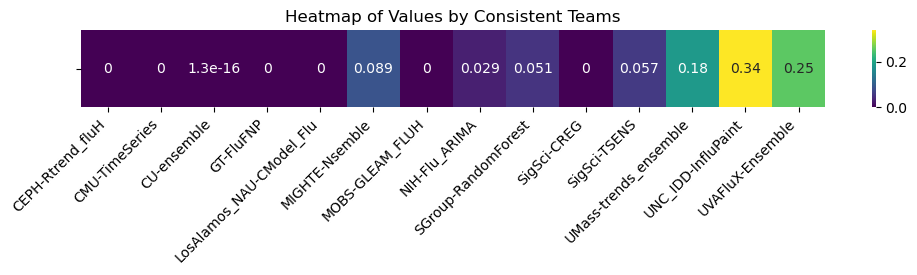

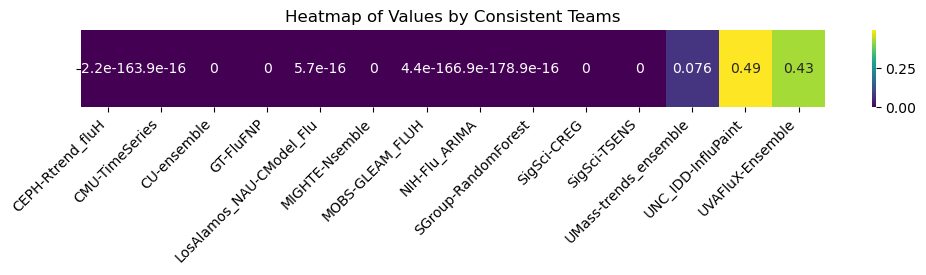

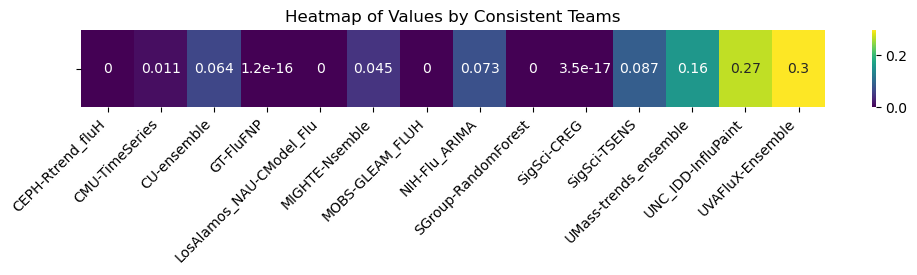

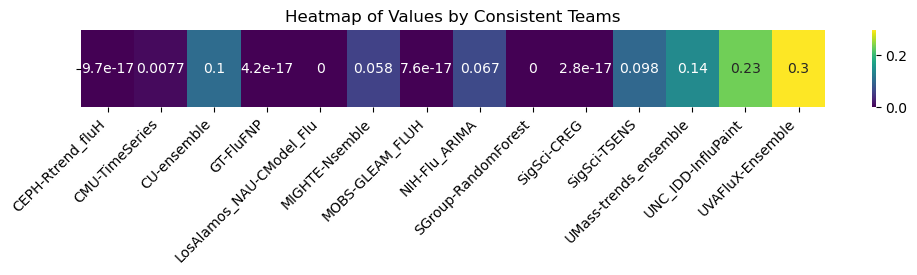

In [774]:
# Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(4):
    # The given array and list of teams
    values = weights[str(i)]
    consistent_teams = [
        'CEPH-Rtrend_fluH', 'CMU-TimeSeries', 'CU-ensemble', 'GT-FluFNP',
        'LosAlamos_NAU-CModel_Flu', 'MIGHTE-Nsemble', 'MOBS-GLEAM_FLUH',
        'NIH-Flu_ARIMA', 'SGroup-RandomForest', 'SigSci-CREG', 'SigSci-TSENS',
        'UMass-trends_ensemble', 'UNC_IDD-InfluPaint', 'UVAFluX-Ensemble'
    ]

    # Reshape the values into a 2D array (1 row, n columns)
    values_2d = values.reshape(1, -1)  # Convert into a shape of (1, 14)

    # Create the heatmap
    plt.figure(figsize=(12, 1))  # Adjust the figsize for a horizontal layout
    sns.heatmap(values_2d, annot=True, cmap='viridis', cbar=True,
                xticklabels=consistent_teams, yticklabels=[""])

    # Rotate x-axis labels for clarity
    plt.xticks(rotation=45, ha='right')
    plt.title("Heatmap of Values by Consistent Teams")
    plt.tight_layout()
    plt.savefig('weights'+str(i)+'.png')
    plt.show()


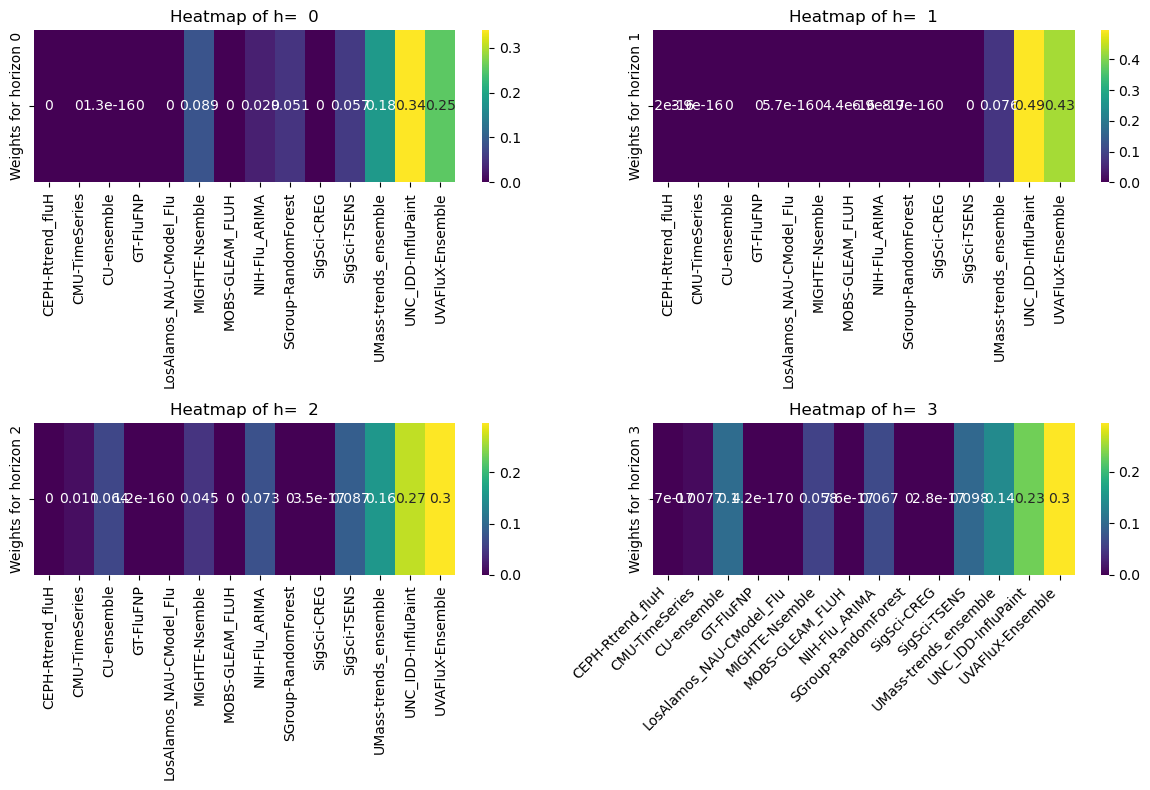

In [763]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: four arrays of values
values1 = weights['0']

values2 = weights['1']
values3 = weights['2']
values4 = weights['3']

# Combine arrays into a 2D array
values_combined = np.array([values1, values2, values3, values4])

# List of team names
consistent_teams = [
    'CEPH-Rtrend_fluH', 'CMU-TimeSeries', 'CU-ensemble', 'GT-FluFNP',
    'LosAlamos_NAU-CModel_Flu', 'MIGHTE-Nsemble', 'MOBS-GLEAM_FLUH',
    'NIH-Flu_ARIMA', 'SGroup-RandomForest', 'SigSci-CREG', 'SigSci-TSENS',
    'UMass-trends_ensemble', 'UNC_IDD-InfluPaint', 'UVAFluX-Ensemble'
]

# Create the heatmap
plt.figure(figsize=(12, 8))  # Set figure size
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.20f}'))

# Loop through each row to create a heatmap for each array
for i in range(values_combined.shape[0]):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    sns.heatmap(values_combined[i:i+1], annot=True, cmap='viridis', cbar=True,
                xticklabels=consistent_teams, yticklabels=[f"Weights for horizon {i}"])
    plt.title(f"Heatmap of h=  {i}")

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [764]:
## We need another code to blend next month (this will be needed if we are forecast this season.)

# Plot

In [765]:
H= 4 # number of horizons
def get_f_dates(c_ref_dates, training_date= '2022-02-07'):

    current_ref_date= [date for date in c_target_end_dates if date >= training_date][:H]
    return current_ref_date
H= 4 # number of horizons
def get_dates(ref_dates, training_date= '2022-02-07'):
    # Available truth data
    # print("Training date: ", training_date)
    current_ref_date= [date for date in ref_dates[4:] if date <= training_date][:-1]
    
    return current_ref_date

In [766]:
get_dates(c_ref_dates, training_date= '2024-04-27')

['2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-23',
 '2023-12-30',
 '2024-01-06',
 '2024-01-13',
 '2024-01-20',
 '2024-01-27',
 '2024-02-03',
 '2024-02-10',
 '2024-02-17',
 '2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06',
 '2024-04-13',
 '2024-04-20']

In [767]:
mapping_target= {'1 wk ahead inc flu hosp': 0,
 '2 wk ahead inc flu hosp': 1,
 '3 wk ahead inc flu hosp': 2,
 '4 wk ahead inc flu hosp': 3}
available_weeks= get_dates(c_ref_dates, training_date= '2024-04-27')
available_weeks

['2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-23',
 '2023-12-30',
 '2024-01-06',
 '2024-01-13',
 '2024-01-20',
 '2024-01-27',
 '2024-02-03',
 '2024-02-10',
 '2024-02-17',
 '2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06',
 '2024-04-13',
 '2024-04-20']

In [768]:
# All Truth data.
region= state_idx_name["US"]
ddt= truth_data(data_t, available_weeks, region)
def get_teams_plot(path, training_week, target, region= state_idx_name["US"]):
    
    h= mapping_target[target]
    
#     print(available_weeks)


    
    our_teams_no_correction= path 

    
    # week to get data:
    ww= training_week
    csv_files = [file for file in our_teams_no_correction if any(date in file for date in [ww])]
    data, ref_date, target_end_date= get_data_new(csv_files, target= target)    
        
    return data[0]

In [769]:
path= glob.glob(os.path.join("./UGuelphensemble-GRYPHON"+"/"+"UGuelphensemble-GRYPHON"+"/"+"US"+"/"+"EWO_Without_correct", "*.csv"))
get_teams_plot(path, '2023-11-11', '2 wk ahead inc flu hosp', region= state_idx_name["US"])

2210.524351221339

In [726]:
data_= {
    "0":[], "1": [], "2": [], "3": []
}

weeks_for_truth_data= {
    "0":[], "1": [], "2": [], "3": []
}



In [846]:
available_weeks
# weeks_for_truth_data

{'0': ['2023-11-11',
  '2023-11-18',
  '2023-11-25',
  '2023-12-02',
  '2023-12-09',
  '2023-12-16',
  '2023-12-23',
  '2023-12-30',
  '2024-01-06',
  '2024-01-13',
  '2024-01-20',
  '2024-01-27',
  '2024-02-03',
  '2024-02-10',
  '2024-02-17',
  '2024-02-24',
  '2024-03-02',
  '2024-03-09',
  '2024-03-16',
  '2024-03-23',
  '2024-03-30',
  '2024-04-06'],
 '1': ['2023-11-18',
  '2023-11-25',
  '2023-12-02',
  '2023-12-09',
  '2023-12-16',
  '2023-12-23',
  '2023-12-30',
  '2024-01-06',
  '2024-01-13',
  '2024-01-20',
  '2024-01-27',
  '2024-02-03',
  '2024-02-10',
  '2024-02-17',
  '2024-02-24',
  '2024-03-02',
  '2024-03-09',
  '2024-03-16',
  '2024-03-23',
  '2024-03-30',
  '2024-04-06',
  '2024-04-13'],
 '2': ['2023-11-25',
  '2023-12-02',
  '2023-12-09',
  '2023-12-16',
  '2023-12-23',
  '2023-12-30',
  '2024-01-06',
  '2024-01-13',
  '2024-01-20',
  '2024-01-27',
  '2024-02-03',
  '2024-02-10',
  '2024-02-17',
  '2024-02-24',
  '2024-03-02',
  '2024-03-09',
  '2024-03-16',
  '2024

In [728]:
for i in range(len(available_weeks)):
    
    for target in list(mapping_target.keys()):
        h= mapping_target[target]
        
        f= get_teams_plot(path, training_week= available_weeks[i], target= target, region= state_idx_name["US"])
        
#         if (i+h)>len(available_weeks[1:]): 
#             break
        weeks_for_truth_data[str(h)].append(available_weeks[i+h])
        
        data_[str(h)].append(f)
#     break
        

IndexError: list index out of range

In [729]:
available_weeks[i]

'2024-04-06'

In [730]:
weeks_for_truth_data

{'0': ['2023-11-11',
  '2023-11-18',
  '2023-11-25',
  '2023-12-02',
  '2023-12-09',
  '2023-12-16',
  '2023-12-23',
  '2023-12-30',
  '2024-01-06',
  '2024-01-13',
  '2024-01-20',
  '2024-01-27',
  '2024-02-03',
  '2024-02-10',
  '2024-02-17',
  '2024-02-24',
  '2024-03-02',
  '2024-03-09',
  '2024-03-16',
  '2024-03-23',
  '2024-03-30',
  '2024-04-06'],
 '1': ['2023-11-18',
  '2023-11-25',
  '2023-12-02',
  '2023-12-09',
  '2023-12-16',
  '2023-12-23',
  '2023-12-30',
  '2024-01-06',
  '2024-01-13',
  '2024-01-20',
  '2024-01-27',
  '2024-02-03',
  '2024-02-10',
  '2024-02-17',
  '2024-02-24',
  '2024-03-02',
  '2024-03-09',
  '2024-03-16',
  '2024-03-23',
  '2024-03-30',
  '2024-04-06',
  '2024-04-13'],
 '2': ['2023-11-25',
  '2023-12-02',
  '2023-12-09',
  '2023-12-16',
  '2023-12-23',
  '2023-12-30',
  '2024-01-06',
  '2024-01-13',
  '2024-01-20',
  '2024-01-27',
  '2024-02-03',
  '2024-02-10',
  '2024-02-17',
  '2024-02-24',
  '2024-03-02',
  '2024-03-09',
  '2024-03-16',
  '2024

In [731]:
len(weeks_for_truth_data['0']), len(weeks_for_truth_data['1']), len(weeks_for_truth_data['2']), len(weeks_for_truth_data['3'])

(22, 22, 22, 21)

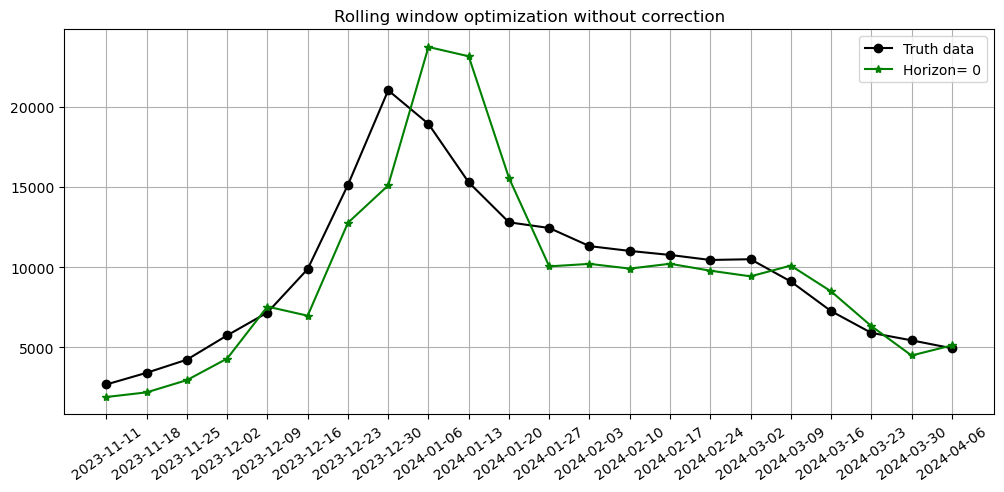

In [732]:
# Horizon 0:
h= 0
ddt_0= truth_data(data_t, weeks_for_truth_data[str(h)], region)
fig, ax = plt.subplots(figsize=(12, 5))
plt.tick_params(axis='x', rotation=35)
plt.title("Rolling window optimization without correction")
plt.plot(ddt_0, label= "Truth data", c= "black", marker= "o")
plt.plot(weeks_for_truth_data[str(h)], data_[str(h)], label= str("Horizon= "+ str(horizon[h+1])), c= "g",marker= "*")
plt.legend()
plt.grid(True)
plt.plot()
plt.savefig('EWO'+str(h)+'.png')
plt.show()

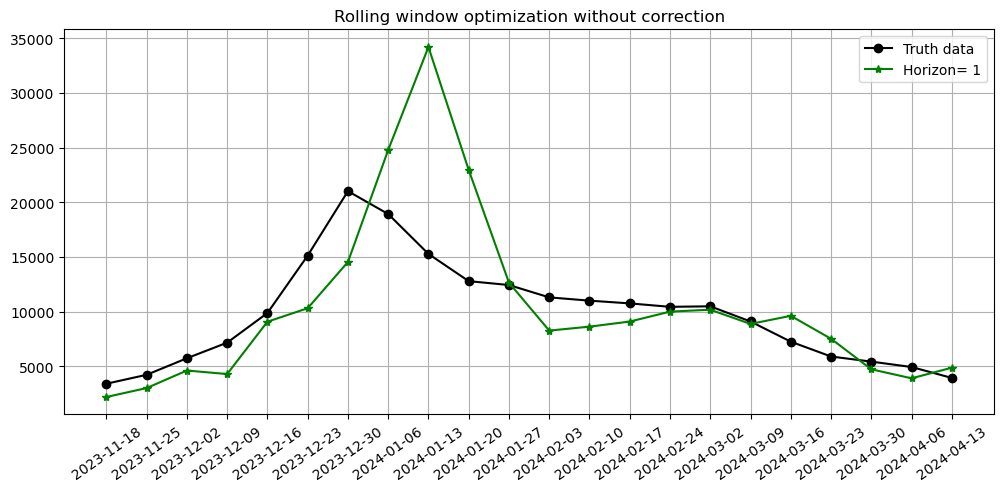

In [733]:
# Horizon 1:
h= 1
ddt_1= truth_data(data_t, weeks_for_truth_data[str(h)], region)
fig, ax = plt.subplots(figsize=(12, 5))
plt.tick_params(axis='x', rotation=35)
plt.title("Rolling window optimization without correction")
plt.plot(ddt_1, label= "Truth data", c= "black", marker= "o")
plt.plot(weeks_for_truth_data[str(h)], data_[str(h)], label= str("Horizon= "+ str(horizon[h+1])), c= "g",marker= "*")
plt.legend()
plt.grid(True)
plt.plot()
plt.savefig('EWO'+str(h)+'.png')
plt.show()

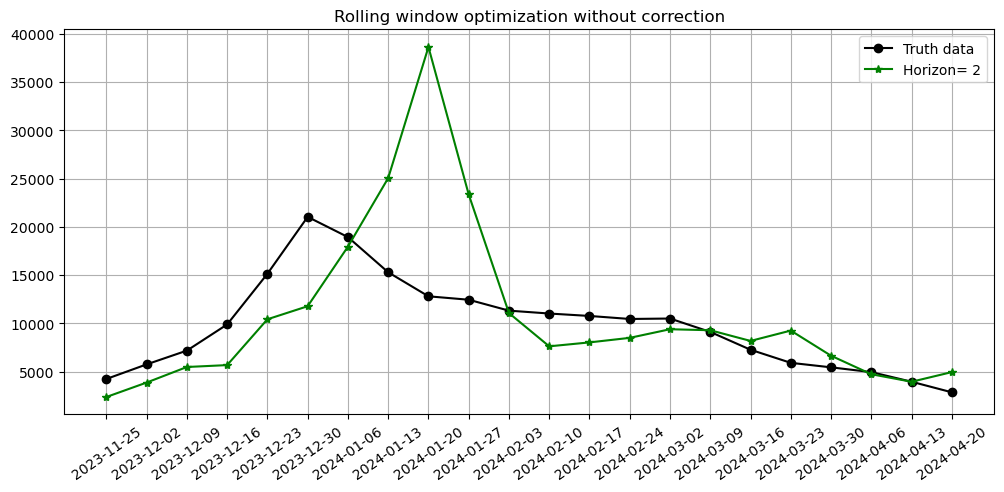

In [734]:
# Horizon 2:
h= 2
ddt_2= truth_data(data_t, weeks_for_truth_data[str(h)], region)
fig, ax = plt.subplots(figsize=(12, 5))
plt.tick_params(axis='x', rotation=35)
plt.title("Rolling window optimization without correction")
plt.plot(ddt_2, label= "Truth data", c= "black", marker= "o")
plt.plot(weeks_for_truth_data[str(h)], data_[str(h)], label= str("Horizon= "+ str(horizon[h+1])), c= "g",marker= "*")
plt.legend()
plt.grid(True)
plt.plot()
plt.savefig('EWO'+str(h)+'.png')
plt.show()

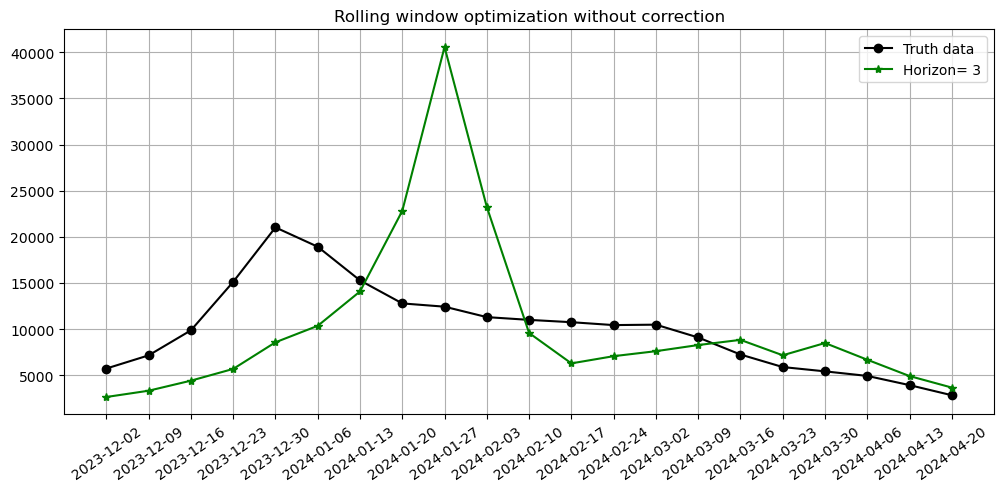

In [735]:
# Horizon 2:
h= 3
ddt_3= truth_data(data_t, weeks_for_truth_data[str(h)], region)
fig, ax = plt.subplots(figsize=(12, 5))
plt.tick_params(axis='x', rotation=35)
plt.title("Rolling window optimization without correction")
plt.plot(ddt_3, label= "Truth data", c= "black", marker= "o")
plt.plot(weeks_for_truth_data[str(h)], data_[str(h)], label= str("Horizon= "+ str(horizon[h+1])), c= "g",marker= "*")
plt.legend()
plt.grid(True)
plt.plot()
plt.savefig('EWO'+str(h)+'.png')
plt.show()

# Compute Average MAE

In [736]:
res= []
for target in list(mapping_target.keys()):
    h= mapping_target[target]

    ddt_= truth_data(data_t, weeks_for_truth_data[str(h)], region)

    forecst= data_[str(h)]

    average_mae = np.mean(np.abs(np.array(ddt_) - np.array(forecst)))

    res.append(average_mae)

In [737]:
res

[1925.3285258508215, 3106.280409081967, 4022.2793955868374, 5545.852454466985]

# END

## MAPE (Mean Absolute Percentage Error)

In [738]:
res= []
for target in list(mapping_target.keys()):
    h= mapping_target[target]

    ddt_= truth_data(data_t, weeks_for_truth_data[str(h)], region)

    forecst= data_[str(h)]

    mape = np.mean(np.abs((ddt_ - forecst) / np.where(ddt_ != 0, ddt_, np.nan)))

    res.append(mape)

In [739]:
mape

0.5037021641856724

# Out teams against other teams

In [775]:
main_path= "./FluSight-forecast-hub-main/model-output/"

In [839]:
consistent_teams= ['LosAlamos_NAU-CModel_Flu',
 'SigSci-TSENS',
 'MIGHTE-Nsemble',
 'CU-ensemble',
 'SGroup-RandomForest',
 'SigSci-CREG',
 'UMass-trends_ensemble',
 'CMU-TimeSeries',
 'UNC_IDD-InfluPaint',
 'CADPH-FluCAT_Ensemble',
 'UVAFluX-Ensemble',
 'UGA_flucast-OKeeffe',
 'NIH-Flu_ARIMA',
 'CEPH-Rtrend_fluH',
 'MOBS-GLEAM_FLUH',
 'GT-FluFNP']
# consistent_teams.remove('GT-FluFNP')
consistent_teams.remove('CADPH-FluCAT_Ensemble')
consistent_teams.remove('UGA_flucast-OKeeffe')
# consistent_teams= ['MIGHTE-Nsemble', 'CU-ensemble', 'SGroup-RandomForest', 'UMass-trends_ensemble', 'CMU-TimeSeries', 'UNC_IDD-InfluPaint', 'UVAFluX-Ensemble', 
#                    'UGA_flucast-OKeeffe', 'NIH-Flu_ARIMA', 'CEPH-Rtrend_fluH', 'MOBS-GLEAM_FLUH']
consistent_teams, len(consistent_teams)


colors = [
    'blue', 'orange', 'magenta', 'yellow', 'purple',
    'brown', 'pink', 'gray', 'olive', 'cyan',
    'lightcoral', 'darkgoldenrod', 'mediumseagreen', 'magenta'
]

print(len(consistent_teams))

14


In [831]:
teams_forecast= {}

for key in consistent_teams:
    teams_forecast[key] = []

In [832]:
teams_forecast

{'LosAlamos_NAU-CModel_Flu': [],
 'SigSci-TSENS': [],
 'MIGHTE-Nsemble': [],
 'CU-ensemble': [],
 'SGroup-RandomForest': [],
 'SigSci-CREG': [],
 'UMass-trends_ensemble': [],
 'CMU-TimeSeries': [],
 'UNC_IDD-InfluPaint': [],
 'UVAFluX-Ensemble': [],
 'NIH-Flu_ARIMA': [],
 'CEPH-Rtrend_fluH': [],
 'MOBS-GLEAM_FLUH': [],
 'GT-FluFNP': []}

In [873]:
def get_plot(teams, target,region= state_idx_name["US"], training_week= "2022-11-05"):
    region= state_idx_name["US"]
    regex = re.compile(r'EW\d+')
    number_wk_ahead= int(target[0])
    h= mapping_target[target]
    
    final_data= []
    final_weeks= []
    next_week_data_list= []
    next_week_list= []
    training_loss= []
    truth_data_list= []
    all_length_weeks= []
    
    validation_team_data= []
    validation_truth= None
    
    region= region
    target= target
    

    
    
#     csv_files= glob.glob(os.path.join(teams, "*.csv"))
    
    
    # csv_files = [file for file in csv_files if any(date in file for date in available_weeks)]

    csv_files = [file for file in teams if any(date in file for date in [training_week])]
    


    # Replace missing files with baseline
    missing_dates = [date for date in available_weeks if not any(date in file for file in csv_files)]


    if len(missing_dates)>0:
        filtered_files = [file for file in Baseline if any(date in file for date in missing_dates)]

        if isinstance(filtered_files, list):
            csv_files.extend(filtered_files)
        else:
            csv_files.append(filtered_files)
#     print(csv_files)

    
    
    # Teams data: Always the first before reaching the training date: One file that contains quantiles for h \{0, 1, 2, 3}
    data, ref_date, target_end_date= get_data_new([csv_files[0]], target= target)

    return data, ref_date


In [834]:
# dtes= {"0":[],
#       "1": [], 
#       "2": [],
#       "3":[]}
for team in list(teams_forecast.keys()):
    path= glob.glob(os.path.join(main_path+team, "*.csv"))
    dts= []
    
    for i in range(len(available_weeks)):
        dt_= []
        for target in list(mapping_target.keys()):
            h= mapping_target[target]

            f, d= get_plot(path, target,region= state_idx_name["US"], training_week= available_weeks[i])
#             print(f[0])
            dt_.append(f[0])
        teams_forecast[team].append(dt_)
        
# This index is just we i overwhelm len(available_weeks). Go to the next cell.


In [836]:
for k in teams_forecast.keys():
    teams_forecast[str(k)]= np.array(teams_forecast[str(k)])

In [838]:
teams_forecast['LosAlamos_NAU-CModel_Flu']

array([[ 1696.46392,  1852.51311,  2002.38362,  2145.59452],
       [ 1696.46392,  1852.51311,  2002.38362,  2145.59452],
       [ 2517.89326,  2869.65533,  3191.1122 ,  3672.39212],
       [ 4052.0841 ,  5114.67151,  6605.29276,  8678.00677],
       [   53.6538 ,    81.12141,   130.16462,   211.2316 ],
       [  401.77191,   556.09915,   780.20302,  1106.86507],
       [ 9688.61529, 12075.69918, 15469.70221, 18885.77158],
       [18878.62964, 26302.24768, 36990.98026, 52144.11236],
       [27183.03811, 37553.38823, 52117.91292, 72107.43699],
       [32856.80241, 44998.68181, 61530.90233, 83471.98709],
       [32396.86969, 42369.9526 , 55107.59682, 71818.51897],
       [ 2005.     ,  2005.     ,  2005.     ,  2005.     ],
       [10204.08947,  8762.384  ,  7534.32027,  6548.07562],
       [ 9192.36788,  7985.12295,  7021.66243,  6150.33467],
       [ 8845.54192,  7938.62652,  7183.41741,  6550.2836 ],
       [ 8394.76532,  7646.49099,  6987.76342,  6426.47679],
       [ 7771.54012,  70

In [876]:
len(available_weeks)

24

In [855]:
h= 0

LosAlamos_NAU-CModel_Flu
SigSci-TSENS
MIGHTE-Nsemble
CU-ensemble
SGroup-RandomForest
SigSci-CREG
UMass-trends_ensemble
CMU-TimeSeries
UNC_IDD-InfluPaint
UVAFluX-Ensemble
NIH-Flu_ARIMA
CEPH-Rtrend_fluH
MOBS-GLEAM_FLUH
GT-FluFNP


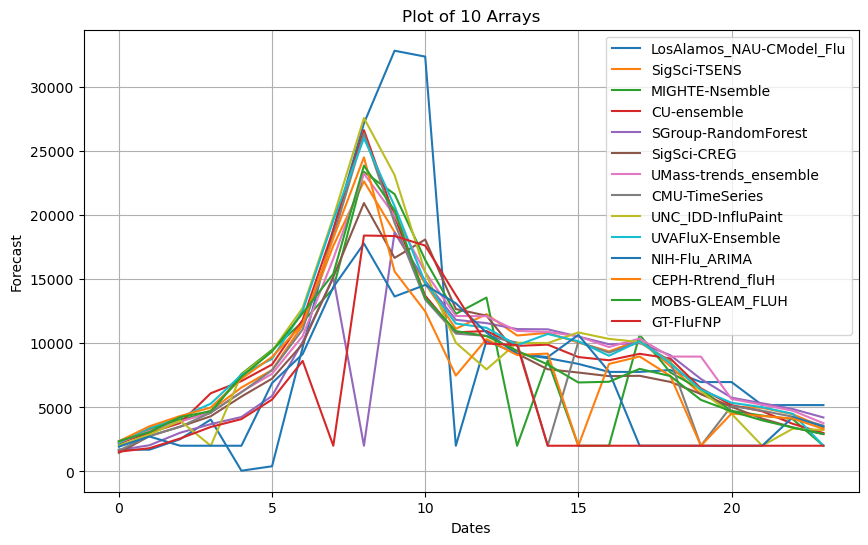

In [872]:
# for k in teams_forecast.keys():
    
    # Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot each array
for i, array in enumerate(teams_forecast):
    print(array)
    plt.plot(teams_forecast[str(array)][:, h], label=array)

# Add labels and title
plt.xlabel('Dates')
plt.ylabel('Forecast')
plt.title('Plot of 10 Arrays')
plt.legend()  # Show legend to identify each line
plt.grid(True)  # Optional: add a grid for better visibility
plt.show()

#         ax.plot)
#     plt.title("Rolling window optimization without correction")
#     plt.plot(ddt_3, label= "Truth data", c= "black", marker= "o")
#     plt.plot(teams_forecast[str(k)][:, h], label= str("Horizon= "+ str(horizon[h+1])), c= "g",marker= "*")
#     plt.legend()
#     plt.grid(True)
#     plt.plot()
#     plt.savefig('EWO'+str(h)+'.png')
#     plt.show()

In [870]:
weeks_for_truth_data[str(h)]

['2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-23',
 '2023-12-30',
 '2024-01-06',
 '2024-01-13',
 '2024-01-20',
 '2024-01-27',
 '2024-02-03',
 '2024-02-10',
 '2024-02-17',
 '2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06']

In [ ]:
# Horizon 2:
h= 3
ddt_3= truth_data(data_t, weeks_for_truth_data[str(h)], region)
fig, ax = plt.subplots(figsize=(12, 5))
plt.tick_params(axis='x', rotation=35)
plt.title("Rolling window optimization without correction")
plt.plot(ddt_3, label= "Truth data", c= "black", marker= "o")
plt.plot(weeks_for_truth_data[str(h)], data_[str(h)], label= str("Horizon= "+ str(horizon[h+1])), c= "g",marker= "*")
plt.legend()
plt.grid(True)
plt.plot()
plt.savefig('EWO'+str(h)+'.png')
plt.show()

In [ ]:
teams_forecast[]

In [ ]:
# for h in [0, 1, 2, 3]:
for target in list(mapping_target.keys())[:-1]:
    h= mapping_target[target]
    all_teams= []
    for team in consistent_teams:
        new= glob.glob(os.path.join(main_path+team, "*.csv"))
        new.sort()
#         new.pop()
        data= get_data_new(new,target)
        all_teams.append(data)
    fig, ax = plt.subplots(figsize=(20, 7))
    plt.tick_params(axis='x', rotation=35)
    for i, color in enumerate(colors[:-1]):
        ax.plot(all_teams[i][:len(dates)], color=color, label= str(consistent_teams[i]))
    plt.title("US National, Horizon: "+str(h))
    plt.plot(t_data, label= "Truth data", c= "black", marker= "o")
#     ax.set_yticks([np.min(t_data), 0, np.max(t_data)])
#     plt.plot(all_data[h],label= str("UOG"),marker= "*", c= "r")
    plt.plot(dates, all_data_correct[h],label= str("EWO with additive correction"),marker= "*", c= "red")
    plt.legend()
    plt.grid(True)
    plt.savefig('all_teams_additive'+str(h)+'.png')
#     plt.savefig('all_teams_multplicative'+str(h)+'.png')
    plt.show() 

In [1305]:
mapping_target

{'1 wk ahead inc flu hosp': 0,
 '2 wk ahead inc flu hosp': 1,
 '3 wk ahead inc flu hosp': 2,
 '4 wk ahead inc flu hosp': 3}

In [ ]:

# Define true values and predicted values
true_values = np.array([3.0, -0.5, 2.0, 7.0])
predicted_values = np.array([2.5, 0.0, 2.1, 7.8])

# Compute MAE using NumPy
average_mae = np.mean(np.abs(true_values - predicted_values))

print(f"Average MAE: {average_mae:.4f}")


# CORRECTION